<a href="https://colab.research.google.com/github/OQHowler/Model_training_practice/blob/main/Heart_disease_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Firstly I imported all the required libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()


Saving framingham.csv to framingham.csv


In [3]:
# dataset cleaning
# I loaded the csv file
disease_df = pd.read_csv("framingham.csv")
# Then I dropped the education column as it was unnecessary in our prediction
disease_df.drop(['education'], inplace = True, axis = 1)
# Then I renamed a column
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)


In [4]:
# removing NaN / NULL values

# I then removed the rows contaning any null entry
# axis=0 signifies that we are removing rows and not columns
disease_df.dropna(axis = 0, inplace = True)

# This part of the code prints the first few rows of the table and also its shape
print(disease_df.head(), disease_df.shape)

# THis prints the count of 0's and 1's in the TenYearCHD column
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

In [10]:

# Now i created two subsets
# columns of x are the features which helps to predict the target variable
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay',
                           'totChol', 'sysBP', 'glucose']])
# y is the target variable
y = np.asarray(disease_df['TenYearCHD'])

# HEre i am normalizing the dataset
# After normalization, each feature in x will have a mean of 0 and a standard deviation of 1
X = preprocessing.StandardScaler().fit(X).transform(X)

# I am now spliting the whole data set into training dataset and testing dataset
# 70 percent of the dataset will be converted into training dataset
# (random_state = 4) gives the same state everytime
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.25, random_state = 3)

# This prints the shape of each of the newly created datasets
# From this we will get the number of features and samples
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (2813, 6) (2813,)
Test set: (938, 6) (938,)


<ipython-input-11-05e14f543960>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df,


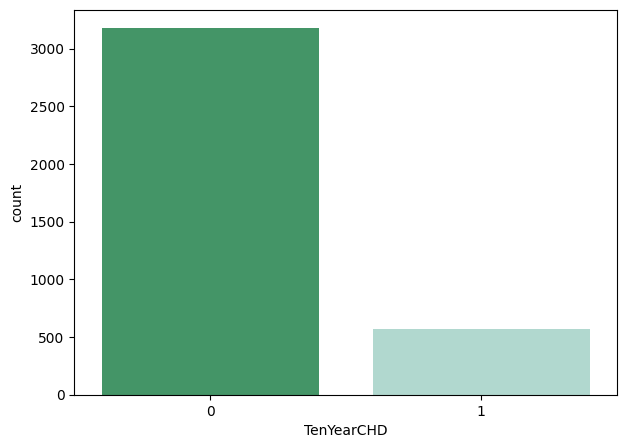

In [11]:
# counting no. of patients affected with CHD
# This sets the figure size of the plot to 7x5 inches.
plt.figure(figsize=(7, 5))

#creates a bar plot showing the count of observations for each category of TenYearCHD
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="BuGn_r")# for color combination
plt.show()# displays the output


In [12]:
# This imports the LogisticRegression class from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# i then created a Logistic Regression model object
logreg = LogisticRegression()

# I did this to fit the logistic regression model to the training data
logreg.fit(X_train, y_train)

# I then made the predictions on the test dataset based on the model trained on the training dataset
y_pred = logreg.predict(X_test)

In [13]:
# This part of the code is based on computing accuracy of my trained model
from sklearn.metrics import accuracy_score
print('Accuracy of the model is =',
      accuracy_score(y_test, y_pred))

Accuracy of the model is = 0.849680170575693


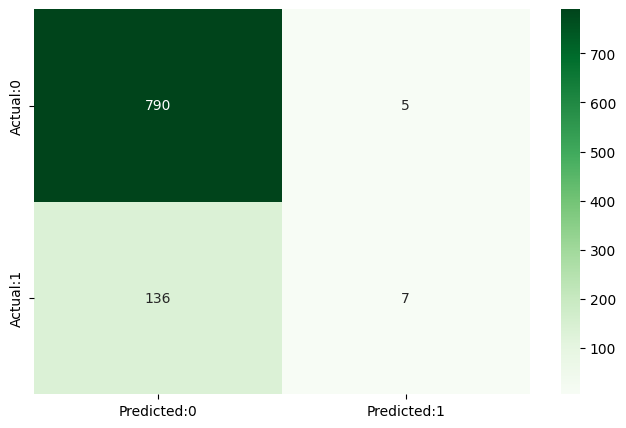

The details for confusion matrix is =
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       795
           1       0.58      0.05      0.09       143

    accuracy                           0.85       938
   macro avg       0.72      0.52      0.50       938
weighted avg       0.81      0.85      0.79       938



In [14]:
# Now I created a Confusion matrix to better understand the performance of my model
from sklearn.metrics import confusion_matrix, classification_report

# This makes a matrix that compares the true labels (y_test) with the predicted labels (y_pred).
cm = confusion_matrix(y_test, y_pred)\

# Now to avoid the confusion matrix to make confusion,I created a DataFrame with proper column and index names
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))#this sets the size of the plot
# I Then created a heatmap for the confusion matrix with annot=True to display the values on the heatmap.
# fmt='d' ensures that the values are displayed as integers.
# cmap='Greens' sets the color scheme for the heatmap
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")

#Now we will finally get a report card of my first trained model
plt.show()
print('The details for confusion matrix is =')
print (classification_report(y_test, y_pred))